In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("SETTTTTOK (1).csv", sep=';')

In [ ]:
df

,Column1,Дата,Город отправления,Город назначения,Тип ТС,Вес отгрузки тонн,Вместимость кг,Общее кол-во рейсов
0,0,03.01.2018,0,0,0,"18,7895",20000.0,1
1,1,03.01.2018,0,1,0,"175,1432",180000.0,9
2,2,03.01.2018,1,2,1,"8,6424",10000.0,1
3,3,03.01.2018,2,3,2,"2,1779",NaN,1
4,4,03.01.2018,2,4,3,"1,6767",NaN,1
...,...,...,...,...,...,...,...,...
297821,297821,31.12.2019,6,20,10,"3,3701",4000.0,1
297822,297822,31.12.2019,6,480,10,"1,9171",4000.0,1
297823,297823,31.12.2019,53,53,4,"0,2280",NaN,1
297824,297824,31.12.2019,55,247,11,"1,9188",3200.0,4


In [ ]:
df.dtypes

Column1                  int64
Дата                    object
Город отправления        int64
Город назначения         int64
Тип ТС                   int64
Вес отгрузки тонн       object
Вместимость кг         float64
Общее кол-во рейсов      int64
dtype: object

In [ ]:
col = df.columns

In [ ]:
col

Index(['Column1', 'Дата', 'Город отправления', 'Город назначения', 'Тип ТС',
       'Вес отгрузки тонн', 'Вместимость кг', 'Общее кол-во рейсов'],
      dtype='object')

In [ ]:
df[col[5]] = df[col[5]].astype(str)

In [ ]:
df.fillna(0)

,Column1,Дата,Город отправления,Город назначения,Тип ТС,Вес отгрузки тонн,Вместимость кг,Общее кол-во рейсов
0,0,03.01.2018,0,0,0,"18,7895",20000.0,1
1,1,03.01.2018,0,1,0,"175,1432",180000.0,9
2,2,03.01.2018,1,2,1,"8,6424",10000.0,1
3,3,03.01.2018,2,3,2,"2,1779",0.0,1
4,4,03.01.2018,2,4,3,"1,6767",0.0,1
...,...,...,...,...,...,...,...,...
297821,297821,31.12.2019,6,20,10,"3,3701",4000.0,1
297822,297822,31.12.2019,6,480,10,"1,9171",4000.0,1
297823,297823,31.12.2019,53,53,4,"0,2280",0.0,1
297824,297824,31.12.2019,55,247,11,"1,9188",3200.0,4


In [ ]:
for i in range(len(df)):
  df[col[5]][i] = df[col[5]][i].replace(',','.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df[col[5]][0]

'18.7895'

In [ ]:
df[col[5]] = df[col[5]].astype(float)

In [ ]:
ves = []
vme = []
for i in df[col[1]].unique():
  ves.append(df[df[col[1]]==i][col[5]].sum())
  vme.append(df[df[col[1]]==i][col[6]].sum())

In [ ]:
sf = pd.DataFrame(df[col[1]].unique())

In [ ]:
sf[col[5]] = ves
sf[col[6]] = vme

In [ ]:
sf.drop(col[6], axis = 1, inplace = True)

In [ ]:
date = []
month = []
year = []
for i in sf[0]:
  date.append(int(i[:2]))
  month.append(int(i[3:5]))
  year.append(int(i[6:]))

In [ ]:
sf["Date"] = date
sf["Month"] = month
sf["Year"] = year

In [ ]:
sf.drop(0, axis = 1, inplace = True)

In [ ]:
calendar = pd.read_csv("calendar.xlsx - Календарь.csv")

In [ ]:
date = []
month = []
year = []
for i in calendar['dates']:
  temp = i.split('/')
  date.append(int(temp[1]))
  month.append(int(temp[0]))
  year.append(int(temp[2]))
calendar["Date"] = date
calendar["Month"] = month
calendar["Year"] = year

In [ ]:
calendar.drop('dates', axis = 1, inplace = True)

In [ ]:
calendar

,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,Date,Month,Year
0,1,1,2,0,New Year,NaN,1.0,8.0,0.0,7.0,0.0,3.0,0,1,1,2013
1,1,1,3,0,New Year,NaN,1.0,7.0,0.0,6.0,0.0,4.0,0,2,1,2013
2,1,1,4,0,New Year,NaN,1.0,6.0,0.0,5.0,0.0,5.0,0,3,1,2013
3,1,1,5,0,New Year,NaN,1.0,5.0,0.0,4.0,0.0,6.0,0,4,1,2013
4,1,1,6,1,New Year,NaN,1.0,4.0,0.0,3.0,0.0,7.0,0,5,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,53,5,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,12,2023
4013,53,5,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,12,2023
4014,53,5,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,12,2023
4015,53,5,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2023


In [ ]:
tf = []
for i in range(len(sf)):
  date = sf.loc[i, "Date"]
  month = sf.loc[i, 'Month']
  year = sf.loc[i, "Year"]
  for j in range(len(calendar)):
    if calendar.loc[j, "Date"] == date and calendar.loc[j, "Month"] == month and calendar.loc[j, "Year"] == year:
      tf.append(calendar.loc[j])

In [ ]:
tf = pd.DataFrame(tf)

In [ ]:
tf.drop(["Year", "Date", "Month"], axis = 1, inplace = True)

In [ ]:
for i in tf.columns:
  sf[i] = tf[i]

In [ ]:
sf.drop(tf.columns, axis = 1, inplace = True)

In [ ]:
tf.reset_index(inplace = True)

In [ ]:
tf.drop('index', axis = 1, inplace = True)

In [ ]:
sf

,Вес отгрузки тонн,Date,Month,Year
0,4354.4571,3,1,2018
1,5752.2419,4,1,2018
2,4259.8869,5,1,2018
3,3359.9627,6,1,2018
4,2937.9584,7,1,2018
...,...,...,...,...
721,8466.6988,27,12,2019
722,7606.7075,28,12,2019
723,7027.5174,29,12,2019
724,1376.4592,30,12,2019


In [ ]:
sf.rename(columns = {'Вес отгрузки тонн' : 'Weight of package, tons'})

,"Weight of package, tons",Date,Month,Year
0,4354.4571,3,1,2018
1,5752.2419,4,1,2018
2,4259.8869,5,1,2018
3,3359.9627,6,1,2018
4,2937.9584,7,1,2018
...,...,...,...,...
721,8466.6988,27,12,2019
722,7606.7075,28,12,2019
723,7027.5174,29,12,2019
724,1376.4592,30,12,2019


In [ ]:
sf.to_csv('SUMDEN.csv', sep=';', encoding='utf-8')

In [ ]:
df = pd.concat([sf, tf], axis = 1)

In [ ]:
df

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary
0,4354.4571,3,1,2018,1,1,3,0,New Year,NaN,1.0,6.0,0.0,5.0,0.0,5.0,0
1,5752.2419,4,1,2018,1,1,4,0,New Year,NaN,1.0,5.0,0.0,4.0,0.0,6.0,0
2,4259.8869,5,1,2018,1,1,5,0,New Year,NaN,1.0,4.0,0.0,3.0,0.0,7.0,0
3,3359.9627,6,1,2018,1,1,6,1,New Year,NaN,1.0,3.0,0.0,2.0,0.0,8.0,0
4,2937.9584,7,1,2018,1,1,7,1,New Year,NaN,1.0,2.0,0.0,1.0,0.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8466.6988,27,12,2019,52,5,5,0,NaN,NaN,0.0,0.0,1.0,2.0,5.0,2.0,"0,5"
722,7606.7075,28,12,2019,52,5,6,1,NaN,NaN,0.0,2.0,0.0,1.0,0.0,1.0,0
723,7027.5174,29,12,2019,52,5,7,1,NaN,NaN,0.0,1.0,0.0,8.0,0.0,2.0,0
724,1376.4592,30,12,2019,53,6,1,0,NaN,NaN,0.0,0.0,2.0,8.0,1.0,2.0,0


In [ ]:
x = df[['Вес отгрузки тонн','Date','Month','Year']][:363]

In [ ]:
x.index +=363

In [ ]:
x

,Вес отгрузки тонн,Date,Month,Year
363,4354.4571,3,1,2018
364,5752.2419,4,1,2018
365,4259.8869,5,1,2018
366,3359.9627,6,1,2018
367,2937.9584,7,1,2018
...,...,...,...,...
721,7049.6299,27,12,2018
722,7076.7519,28,12,2018
723,4287.4982,29,12,2018
724,290.4057,30,12,2018


In [ ]:
y = df[['Вес отгрузки тонн','Date','Month','Year']][363:]

In [ ]:
y.index -=363

In [ ]:
y

,Вес отгрузки тонн,Date,Month,Year
0,1596.9171,3,1,2019
1,5643.2646,4,1,2019
2,4103.8003,5,1,2019
3,4937.5031,6,1,2019
4,3533.2314,7,1,2019
...,...,...,...,...
358,8466.6988,27,12,2019
359,7606.7075,28,12,2019
360,7027.5174,29,12,2019
361,1376.4592,30,12,2019


In [ ]:
y = y.append(x)

In [ ]:
y

,Вес отгрузки тонн,Date,Month,Year
0,1596.9171,3,1,2019
1,5643.2646,4,1,2019
2,4103.8003,5,1,2019
3,4937.5031,6,1,2019
4,3533.2314,7,1,2019
...,...,...,...,...
721,7049.6299,27,12,2018
722,7076.7519,28,12,2018
723,4287.4982,29,12,2018
724,290.4057,30,12,2018


In [ ]:
y

,Вес отгрузки тонн,Date,Month,Year
0,1596.9171,3,1,2019
1,5643.2646,4,1,2019
2,4103.8003,5,1,2019
3,4937.5031,6,1,2019
4,3533.2314,7,1,2019
...,...,...,...,...
721,7049.6299,27,12,2018
722,7076.7519,28,12,2018
723,4287.4982,29,12,2018
724,290.4057,30,12,2018


In [ ]:
y.drop(['Date','Month','Year'],axis = 1, inplace = True)

In [ ]:
y = y.rename(columns = {"Вес отгрузки тонн" : "OHMY"})

In [ ]:
result = pd.concat([df, y], axis = 1)

In [ ]:
result

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,OHMY
0,4354.4571,3,1,2018,1,1,3,0,New Year,NaN,1.0,6.0,0.0,5.0,0.0,5.0,0,1596.9171
1,5752.2419,4,1,2018,1,1,4,0,New Year,NaN,1.0,5.0,0.0,4.0,0.0,6.0,0,5643.2646
2,4259.8869,5,1,2018,1,1,5,0,New Year,NaN,1.0,4.0,0.0,3.0,0.0,7.0,0,4103.8003
3,3359.9627,6,1,2018,1,1,6,1,New Year,NaN,1.0,3.0,0.0,2.0,0.0,8.0,0,4937.5031
4,2937.9584,7,1,2018,1,1,7,1,New Year,NaN,1.0,2.0,0.0,1.0,0.0,9.0,0,3533.2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8466.6988,27,12,2019,52,5,5,0,NaN,NaN,0.0,0.0,1.0,2.0,5.0,2.0,"0,5",7049.6299
722,7606.7075,28,12,2019,52,5,6,1,NaN,NaN,0.0,2.0,0.0,1.0,0.0,1.0,0,7076.7519
723,7027.5174,29,12,2019,52,5,7,1,NaN,NaN,0.0,1.0,0.0,8.0,0.0,2.0,0,4287.4982
724,1376.4592,30,12,2019,53,6,1,0,NaN,NaN,0.0,0.0,2.0,8.0,1.0,2.0,0,290.4057


In [ ]:
df = result

In [ ]:
df

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,OHMY
0,4354.4571,3,1,2018,1,1,3,0,New Year,NaN,1.0,6.0,0.0,5.0,0.0,5.0,0,1596.9171
1,5752.2419,4,1,2018,1,1,4,0,New Year,NaN,1.0,5.0,0.0,4.0,0.0,6.0,0,5643.2646
2,4259.8869,5,1,2018,1,1,5,0,New Year,NaN,1.0,4.0,0.0,3.0,0.0,7.0,0,4103.8003
3,3359.9627,6,1,2018,1,1,6,1,New Year,NaN,1.0,3.0,0.0,2.0,0.0,8.0,0,4937.5031
4,2937.9584,7,1,2018,1,1,7,1,New Year,NaN,1.0,2.0,0.0,1.0,0.0,9.0,0,3533.2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8466.6988,27,12,2019,52,5,5,0,NaN,NaN,0.0,0.0,1.0,2.0,5.0,2.0,"0,5",7049.6299
722,7606.7075,28,12,2019,52,5,6,1,NaN,NaN,0.0,2.0,0.0,1.0,0.0,1.0,0,7076.7519
723,7027.5174,29,12,2019,52,5,7,1,NaN,NaN,0.0,1.0,0.0,8.0,0.0,2.0,0,4287.4982
724,1376.4592,30,12,2019,53,6,1,0,NaN,NaN,0.0,0.0,2.0,8.0,1.0,2.0,0,290.4057


In [ ]:
result.dtypes

Вес отгрузки тонн      float64
Date                     int64
Month                    int64
Year                     int64
weekinyear               int64
weekinmonth              int64
weekdays                 int64
weekend                  int64
officialholidays        object
nonofficialholidays     object
BinaryHoliday          float64
num_of_hol             float64
forward                float64
forward_how_much       float64
back                   float64
back_how_much          float64
salary                  object
OHMY                   float64
dtype: object

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
temp = df['officialholidays'].unique()
for i in range(len(df)):
  if df.loc[i, 'officialholidays'] == temp[0]:
    df.loc[i, 'officialholidays'] = 1
  if df.loc[i, 'officialholidays'] == temp[1]:
    df.loc[i, 'officialholidays'] = 0
  if df.loc[i, 'officialholidays'] == temp[2]:
    df.loc[i, 'officialholidays'] = 2
  if df.loc[i, 'officialholidays'] == temp[3]:
    df.loc[i, 'officialholidays'] = 3
  if df.loc[i, 'officialholidays'] == temp[4]:
    df.loc[i, 'officialholidays'] = 4
  if df.loc[i, 'officialholidays'] == temp[5]:
    df.loc[i, 'officialholidays'] = 5
  if df.loc[i, 'officialholidays'] == temp[6]:
    df.loc[i, 'officialholidays'] = 6

In [ ]:
df['nonofficialholidays'].value_counts()

0                           714
Tatianas Day/Student day      2
Saint Valentine Day           2
Space day                     2
Teenagers day                 2
Knowledge Day                 2
Black Friday                  2
Name: nonofficialholidays, dtype: int64

In [ ]:
temp = df['nonofficialholidays'].unique()
for i in range(len(df)):
  if df.loc[i, 'salary'] == '0,5':
    df.loc[i, 'salary'] = 0.5

In [ ]:
temp = df['nonofficialholidays'].unique()
for i in range(len(df)):
  if df.loc[i, 'nonofficialholidays'] == temp[0]:
    df.loc[i, 'nonofficialholidays'] = 0
  if df.loc[i, 'nonofficialholidays'] == temp[1]:
    df.loc[i, 'nonofficialholidays'] = 1
  if df.loc[i, 'nonofficialholidays'] == temp[2]:
    df.loc[i, 'nonofficialholidays'] = 2
  if df.loc[i, 'nonofficialholidays'] == temp[3]:
    df.loc[i, 'nonofficialholidays'] = 3
  if df.loc[i, 'nonofficialholidays'] == temp[4]:
    df.loc[i, 'nonofficialholidays'] = 4
  if df.loc[i, 'nonofficialholidays'] == temp[5]:
    df.loc[i, 'nonofficialholidays'] = 5
  if df.loc[i, 'nonofficialholidays'] == temp[6]:
    df.loc[i, 'nonofficialholidays'] = 6

In [ ]:
df['officialholidays'] = df['officialholidays'].astype(float)

In [ ]:
df['nonofficialholidays'] = df['nonofficialholidays'].astype(float)

In [ ]:
df['salary'] = df['salary'].astype(float)

In [ ]:
y = df['Вес отгрузки тонн']

In [ ]:
X = df[df.columns[1:]]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_tr, X_t = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8) + 1:]
y_tr, y_t = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8) + 1:]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler = scaler.fit(X_tr)

In [ ]:
X_tr = scaler.transform(X_tr)
X_t = scaler.transform(X_t)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr = linreg.fit(X_tr, y_tr)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score(y_t, lr.predict(X_t))

-0.987109458736871

In [ ]:
mean_squared_error(y_t, lr.predict(X_t))

3445930.399337423

In [ ]:
y_t

581    7455.0887
582    6465.0453
583    7576.3887
584    6821.2962
585    6098.9910
         ...    
721    8466.6988
722    7606.7075
723    7027.5174
724    1376.4592
725       9.9458
Name: Вес отгрузки тонн, Length: 145, dtype: float64

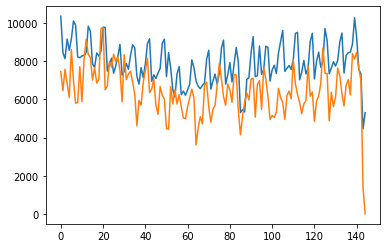

In [ ]:
plt.plot(np.arange(len(lr.predict(X_t))), lr.predict(X_t))
plt.plot(np.arange(len(y_t)), y_t)

In [ ]:
y_t.shape

(145,)

In [ ]:
lr.predict(X_t).shape

(145,)

In [ ]:
np.array(y_t)

array([7455.0887, 6465.0453, 7576.3887, 6821.2962, 6098.991 , 8605.7526,
       6999.9769, 5797.9629, 5843.34  , 7716.3861, 5896.1177, 8064.0363,
       9141.5633, 8360.2388, 8191.5479, 7012.4615, 7675.757 , 6854.3347,
       7042.6133, 9701.5743, 9761.4459, 6514.2962, 6680.2128, 8001.5736,
       7689.3434, 8368.622 , 7974.017 , 8234.4827, 7519.1887, 5878.004 ,
       8338.7407, 7040.2566, 7326.3587, 7476.095 , 6899.6515, 6271.9751,
       4620.4413, 5951.7944, 5704.8489, 6892.6668, 7525.8556, 8149.398 ,
       6358.025 , 6531.6987, 7090.9671, 5710.1765, 5222.1203, 6675.1196,
       6216.603 , 6021.1489, 4471.5818, 4443.634 , 6668.3421, 5766.2763,
       6520.9165, 5763.7162, 6247.9816, 5613.6032, 5026.3369, 4997.9969,
       5619.947 , 6092.745 , 6537.6961, 6076.478 , 3618.65  , 4505.3965,
       5097.8408, 4720.7245, 6739.9127, 6903.9686, 5599.7398, 4807.3992,
       5491.8597, 5704.8489, 6744.9987, 7888.0921, 7081.0209, 6145.6807,
       5692.2748, 6803.3705, 6504.2039, 5850.0181, 

In [ ]:
np.array(lr.predict(X_t))

array([10353.01203608,  8450.89811385,  8131.8710265 ,  9158.45565881,
        8572.14235536,  9167.41326437, 10104.89025967,  9891.12198157,
        8221.75991168,  8180.01554924,  8279.01435172,  8302.41914354,
        8454.23259615,  9833.31067262,  9566.03452414,  7871.86307426,
        7678.57391039,  8433.27194924,  8270.96664937,  8522.28764977,
        9784.31100062,  9768.47343674,  7479.678821  ,  7847.65784206,
        8148.1356449 ,  7373.21646304,  7751.06981615,  8258.81863104,
        8877.17107854,  7276.14878555,  7479.76853834,  7879.79804158,
        7576.49249446,  8304.33749809,  8859.61844502,  8688.95118418,
        7216.81777147,  6798.09713044,  7670.01163128,  7145.3199633 ,
        7858.31625226,  8922.90216449,  9175.05509068,  6948.98647934,
        7286.64013352,  7094.81410677,  7385.64338826,  7623.24191765,
        8930.42617414,  9155.41856527,  7191.18003477,  8445.48481991,
        7628.90607306,  6505.78358415,  6132.70717406,  7341.24384035,
      

In [ ]:
df

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,OHMY
0,4354.4571,3,1,2018,1,1,3,0,1.0,0.0,1.0,6.0,0.0,5.0,0.0,5.0,0.0,1596.9171
1,5752.2419,4,1,2018,1,1,4,0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,6.0,0.0,5643.2646
2,4259.8869,5,1,2018,1,1,5,0,1.0,0.0,1.0,4.0,0.0,3.0,0.0,7.0,0.0,4103.8003
3,3359.9627,6,1,2018,1,1,6,1,1.0,0.0,1.0,3.0,0.0,2.0,0.0,8.0,0.0,4937.5031
4,2937.9584,7,1,2018,1,1,7,1,1.0,0.0,1.0,2.0,0.0,1.0,0.0,9.0,0.0,3533.2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8466.6988,27,12,2019,52,5,5,0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,0.5,7049.6299
722,7606.7075,28,12,2019,52,5,6,1,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,7076.7519
723,7027.5174,29,12,2019,52,5,7,1,0.0,0.0,0.0,1.0,0.0,8.0,0.0,2.0,0.0,4287.4982
724,1376.4592,30,12,2019,53,6,1,0,0.0,0.0,0.0,0.0,2.0,8.0,1.0,2.0,0.0,290.4057


In [ ]:
df

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,OHMY
0,4354.4571,3,1,2018,1,1,3,0,1.0,0.0,1.0,6.0,0.0,5.0,0.0,5.0,0.0,1596.9171
1,5752.2419,4,1,2018,1,1,4,0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,6.0,0.0,5643.2646
2,4259.8869,5,1,2018,1,1,5,0,1.0,0.0,1.0,4.0,0.0,3.0,0.0,7.0,0.0,4103.8003
3,3359.9627,6,1,2018,1,1,6,1,1.0,0.0,1.0,3.0,0.0,2.0,0.0,8.0,0.0,4937.5031
4,2937.9584,7,1,2018,1,1,7,1,1.0,0.0,1.0,2.0,0.0,1.0,0.0,9.0,0.0,3533.2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,8466.6988,27,12,2019,52,5,5,0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,0.5,7049.6299
722,7606.7075,28,12,2019,52,5,6,1,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,7076.7519
723,7027.5174,29,12,2019,52,5,7,1,0.0,0.0,0.0,1.0,0.0,8.0,0.0,2.0,0.0,4287.4982
724,1376.4592,30,12,2019,53,6,1,0,0.0,0.0,0.0,0.0,2.0,8.0,1.0,2.0,0.0,290.4057


In [ ]:
df.corr()

,Вес отгрузки тонн,Date,Month,Year,weekinyear,weekinmonth,weekdays,weekend,officialholidays,nonofficialholidays,BinaryHoliday,num_of_hol,forward,forward_how_much,back,back_how_much,salary,OHMY
Вес отгрузки тонн,1.000000,1.034723e-01,4.827512e-02,-7.429104e-02,0.053986,0.121865,-0.032828,-1.743555e-01,-0.046848,4.534813e-02,-0.134650,-0.357301,0.102364,-0.082262,0.236839,-0.147367,1.010646e-01,0.650068
Date,0.103472,1.000000e+00,-2.417365e-03,4.053761e-14,0.081210,0.951225,-0.010408,-9.105073e-03,-0.211796,2.987187e-02,-0.220667,-0.057743,0.056942,0.133878,0.088934,-0.142649,1.712403e-02,0.103472
Month,0.048275,-2.417365e-03,1.000000e+00,7.619016e-13,0.996282,0.060716,-0.002741,3.774833e-03,-0.050937,2.309727e-02,-0.178872,-0.080837,0.057692,0.118486,0.066141,-0.254982,9.362636e-03,0.048275
Year,-0.074291,4.053761e-14,7.619016e-13,1.000000e+00,0.004783,-0.009457,-0.000688,2.868032e-15,0.013951,2.796541e-14,0.011308,-0.020676,-0.012255,-0.099125,-0.013775,-0.030061,1.508944e-14,0.074291
weekinyear,0.053986,8.121028e-02,9.962820e-01,4.783398e-03,1.000000,0.144102,-0.022680,-1.206619e-02,-0.070128,2.497456e-02,-0.198286,-0.093405,0.079330,0.131247,0.076583,-0.262475,1.316999e-02,0.055987
weekinmonth,0.121865,9.512254e-01,6.071622e-02,-9.456657e-03,0.144102,1.000000,-0.221264,-1.721421e-01,-0.226359,2.901963e-02,-0.253468,-0.156349,0.251976,0.176724,0.128146,-0.147907,4.783172e-02,0.133056
weekdays,-0.032828,-1.040759e-02,-2.741030e-03,-6.883512e-04,-0.022680,-0.221264,1.000000,7.903784e-01,0.075446,4.820259e-02,0.095534,0.441427,-0.899885,-0.107749,-0.176674,-0.132572,-1.249705e-01,-0.100512
weekend,-0.174356,-9.105073e-03,3.774833e-03,2.868032e-15,-0.012066,-0.172142,0.790378,1.000000e+00,0.092173,-1.245387e-02,0.097806,0.586305,-0.694804,-0.164476,-0.667862,-0.218235,-2.181584e-01,-0.091729
officialholidays,-0.046848,-2.117963e-01,-5.093710e-02,1.395107e-02,-0.070128,-0.226359,0.075446,9.217304e-02,1.000000,-2.650613e-02,0.876109,0.265753,-0.237885,-0.040749,-0.237337,0.039893,-1.346544e-01,-0.028018
nonofficialholidays,0.045348,2.987187e-02,2.309727e-02,2.796541e-14,0.024975,0.029020,0.048203,-1.245387e-02,-0.026506,1.000000e+00,-0.030254,-0.022596,-0.045312,-0.019271,0.084164,-0.019612,-3.467293e-02,0.052440


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.to_csv('SCUM.csv', sep=';', encoding="utf-8")

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()

In [ ]:
lasso = Lasso()

In [ ]:
grid = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'positive' : [True, False]
}
search = GridSearchCV(linreg, grid, cv=5, scoring = 'r2', n_jobs = -1, verbose=10)
search.fit(X_train, y_train)
linreg_params = search.best_params_
linreg_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}

In [ ]:
grid = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'positive' : [True, False]
}
search = GridSearchCV(ridge, grid, cv=5, scoring = 'r2', n_jobs = -1, verbose=10)
search.fit(X_train, y_train)
ridge_params = search.best_params_
ridge_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [ ]:
grid = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'positive' : [True, False],
    'warm_start' : [True, False],
    'selection' : ['cyclic', 'random']
}
search = GridSearchCV(lasso, grid, cv=5, scoring = 'r2', n_jobs = -1, verbose=10)
search.fit(X_train, y_train)
lasso_params = search.best_params_
lasso_params

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


{'copy_X': True,
 'fit_intercept': True,
 'normalize': True,
 'positive': False,
 'selection': 'cyclic',
 'warm_start': True}

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr)
X_train_scaled = scaler.transform(X_tr)
X_test_scaled = scaler.transform(X_t)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=6)
dtree.fit(X_tr, y_tr)

y_train_predict_dtree = dtree.predict(X_tr)
y_test_predict_dtree = dtree.predict(X_t)

In [ ]:
linreg = LinearRegression(copy_X = True, fit_intercept = False, normalize = True, positive = False)
linreg.fit(X_train_scaled, y_tr)

y_train_predict_linreg = linreg.predict(X_train_scaled)
y_test_predict_linreg = linreg.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
lasso = Lasso(copy_X = True, fit_intercept = True, normalize = True, positive = False, selection = 'cyclic', warm_start = True)
lasso.fit(X_train_scaled, y_tr)

y_train_predict_lasso = lasso.predict(X_train_scaled)
y_test_predict_lasso = lasso.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
ridge = Ridge(copy_X = True, fit_intercept = True, normalize = False, positive = False)
ridge.fit(X_train_scaled, y_tr)

y_train_predict_ridge = ridge.predict(X_train_scaled)
y_test_predict_ridge = ridge.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_predicts():
    fig = make_subplots(
        rows=1, cols=4,
        subplot_titles=(
            "Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree"
        )
    )

    fig.add_trace(
        go.Scattergl(
            x=y_t,
            y=y_test_predict_lasso,
            mode='markers',
            showlegend=False,
            marker=dict(size=5, opacity=0.8)
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scattergl(
            x=y_t,
            y=y_test_predict_lasso,
            mode='markers',
            showlegend=False,
            marker=dict(size=5, opacity=0.8)
        ),
        row=1, col=2

    )

    fig.add_trace(
        go.Scattergl(
            x=y_t,
            y=y_test_predict_ridge,
            mode='markers',
            showlegend=False,
            marker=dict(size=5, opacity=0.8)
        ),
        row=1, col=3
    )

    fig.add_trace(
        go.Scattergl(
            x=y_t,
            y=y_test_predict_dtree,
            mode='markers',
            showlegend=False,
            marker=dict(size=5, opacity=0.8)
        ),
        row=1, col=4
    )

    for i in range(4):

        fig.add_trace(
            go.Scatter(
                x=np.linspace(0, y_test.max(), 2),
                y=np.linspace(0, y_test.max(), 2),
                showlegend=False,
                mode='lines',
                marker=dict(color='black')
            ),
            row=1, col=i+1
        )

    fig.update_layout(
        height=500,
        width=950,
        xaxis_title="y true",

        yaxis_title="y predicted",


        )
    fig.update_layout(
        height=500,
        width=950,
        xaxis_title="y true",

        yaxis_title="y predicted",

    )
    fig.update_layout(
        height=500,
        width=950,
        xaxis_title="y true",

        yaxis_title="y predicted",

    )
    fig.update_layout(
        height=500,
        width=950,
        xaxis_title="y true",

        yaxis_title="y predicted",

    )
    fig.show()

In [ ]:
plot_predicts()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_t, y_test_predict_dtree)

939.0171328137601

In [ ]:
mean_absolute_error(y_t, y_test_predict_linreg)

6154.599883483008

In [ ]:
mean_absolute_error(y_t, y_test_predict_ridge)

1691.0670975152993

In [ ]:
mean_absolute_error(y_t, y_test_predict_lasso)

1536.3559158804317

In [ ]:
y_test_predict_dtree.mean()

7085.122759150228

In [ ]:
y_test_predict_linreg.mean()

283.22671513768154

In [ ]:
y_test_predict_lasso.mean()

7855.109858032106

In [ ]:
y_test_predict_ridge.mean()

8053.333767038491

In [ ]:
xttf = df[['Вес отгрузки тонн','Date','Month','Year']][363:]